## Plotting SPI (Standardized Precipitation Index)

### Importing Required Libraries

In [10]:
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


# Reading 'Datasets.csv'

In [2]:
data = pd.read_csv('Datasets.csv', usecols=[2])
data = data.set_index(
    pd.date_range('1980', periods=len(data), freq='M')
)

## The following code are used to calculate standardized Precipitation Index Function

### Description
The `spi` function calculates the Standardized Precipitation Index (SPI) based on the provided time series data (`ds`) and a specified time interval or scale (`thresh`). The function involves several steps, including rolling mean computation, natural log transformation, calculation of distribution parameters, and finally, the computation of the SPI using the gamma distribution and its inverse.

### Function Parameters
- `ds`: Time series data (pandas Series or DataFrame).
- `thresh`: Time interval or scale for rolling mean computation.

### Steps

1. **Rolling Mean / Moving Averages:**
   - Computes the rolling mean of the input data using the specified time interval (`thresh`).

2. **Natural Log of Moving Averages:**
   - Takes the natural logarithm of the computed moving averages.
   - Handles cases where the natural logarithm results in infinity by replacing it with NaN.

3. **Overall Mean of Moving Averages:**
   - Calculates the overall mean of the moving averages.

4. **Summation of Natural Log of Moving Averages:**
   - Computes the summation of the natural logarithm of moving averages.

5. **Computing Essentials for Gamma Distribution:**
   - Determines the size of the data (`n`).
   - Computes the parameter `A` for the gamma distribution.
   - Calculates the shape parameter (`alpha`) and scale parameter (`beta`) for the gamma distribution.

6. **Gamma Distribution (CDF):**
   - Computes the cumulative distribution function (CDF) of the gamma distribution.

7. **Standardized Precipitation Index (SPI):**
   - Computes the SPI using the inverse of the gamma distribution's CDF.

### Returns
The function returns:
- `ds_ma`: Rolling mean of the input data.
- `ds_In`: Natural log of the rolling mean.
- `ds_mu`: Overall mean of the moving averages.
- `ds_sum`: Summation of the natural log of moving averages.
- `n`: Size of the data.
- `A`: Computed parameter A.
- `alpha`: Shape parameter for the gamma distribution.
- `beta`: Scale parameter for the gamma distribution.
- `gamma`: CDF values of the gamma distribution.
- `norm_spi`: Standardized Precipitation Index.

### Example Usage
```python
# Example usage of spi function
result = spi(data_series, time_interval)


In [15]:
def spi(ds, thresh):
    ds_ma = ds.rolling(thresh, center=False).mean()
    
    #Natural log of moving averages
    ds_In = np.log(ds_ma)
    ds_In[ np.isinf(ds_In) == True] = np.nan  #Change infinity to NaN
    ds_mu = np.nanmean(ds_ma)
    ds_sum = np.nansum(ds_In)
        
    #Computing essentials for gamma distribution
    n = len(ds_In[thresh-1:])                  
    A = np.log(ds_mu) - (ds_sum/n)             
    alpha = (1/(4*A))*(1+(1+((4*A)/3))**0.5)  
    beta = ds_mu/alpha                        
    
    #Gamma Distribution (CDF)
    gamma = st.gamma.cdf(ds_ma, a=alpha, scale=beta)  
    
    #Standardized Precipitation Index   (Inverse of CDF)
    norm_spi = st.norm.ppf(gamma, loc=0, scale=1)  #loc is mean and scale is standard dev.
    
    return ds_ma, ds_In, ds_mu, ds_sum, n, A, alpha, beta, gamma, norm_spi


## Calculating SPI for Different Time Intervals
The following code calculates the Standardized Precipitation Index (SPI) for different time intervals (3, 6, and 12 months) using the previously defined `spi` function. The SPI values are then added to the original DataFrame under new columns named 'spi_3', 'spi_6', and 'spi_12'.

In [14]:
times = [3, 6, 12]
for i in times:
    x = spi(data['Precipitation'], i)
    data['spi_'+str(i)] = x[9]



## Plotting SPI for Different Time Intervals

### Description
This code generates subplots to visualize the Standardized Precipitation Index (SPI) for different time intervals (3, 6, and 12 months) using bar plots. Each subplot represents a specific time interval, and SPI values are color-coded based on their positivity or negativity.

### Key Features
- Subplots with 3 rows and adjusted vertical spacing.
- Color-coded bars based on SPI values (positive: blue, negative: green).
- X-axis formatted with years, and major tick locations set every 2 years.
- Horizontal line at y=0 for reference.
- Legends added to the upper right corner.
- Y-axis ticks set from -4 to 4, with labels from -3 to 5.
- Y-axis labeled as 'SPI' with fontsize 12.
- X-axis ticks and labels removed for subplots except the last one.

### Result
The resulting plot provides a visual representation of SPI values for different time intervals, highlighting their variation and trends over time.


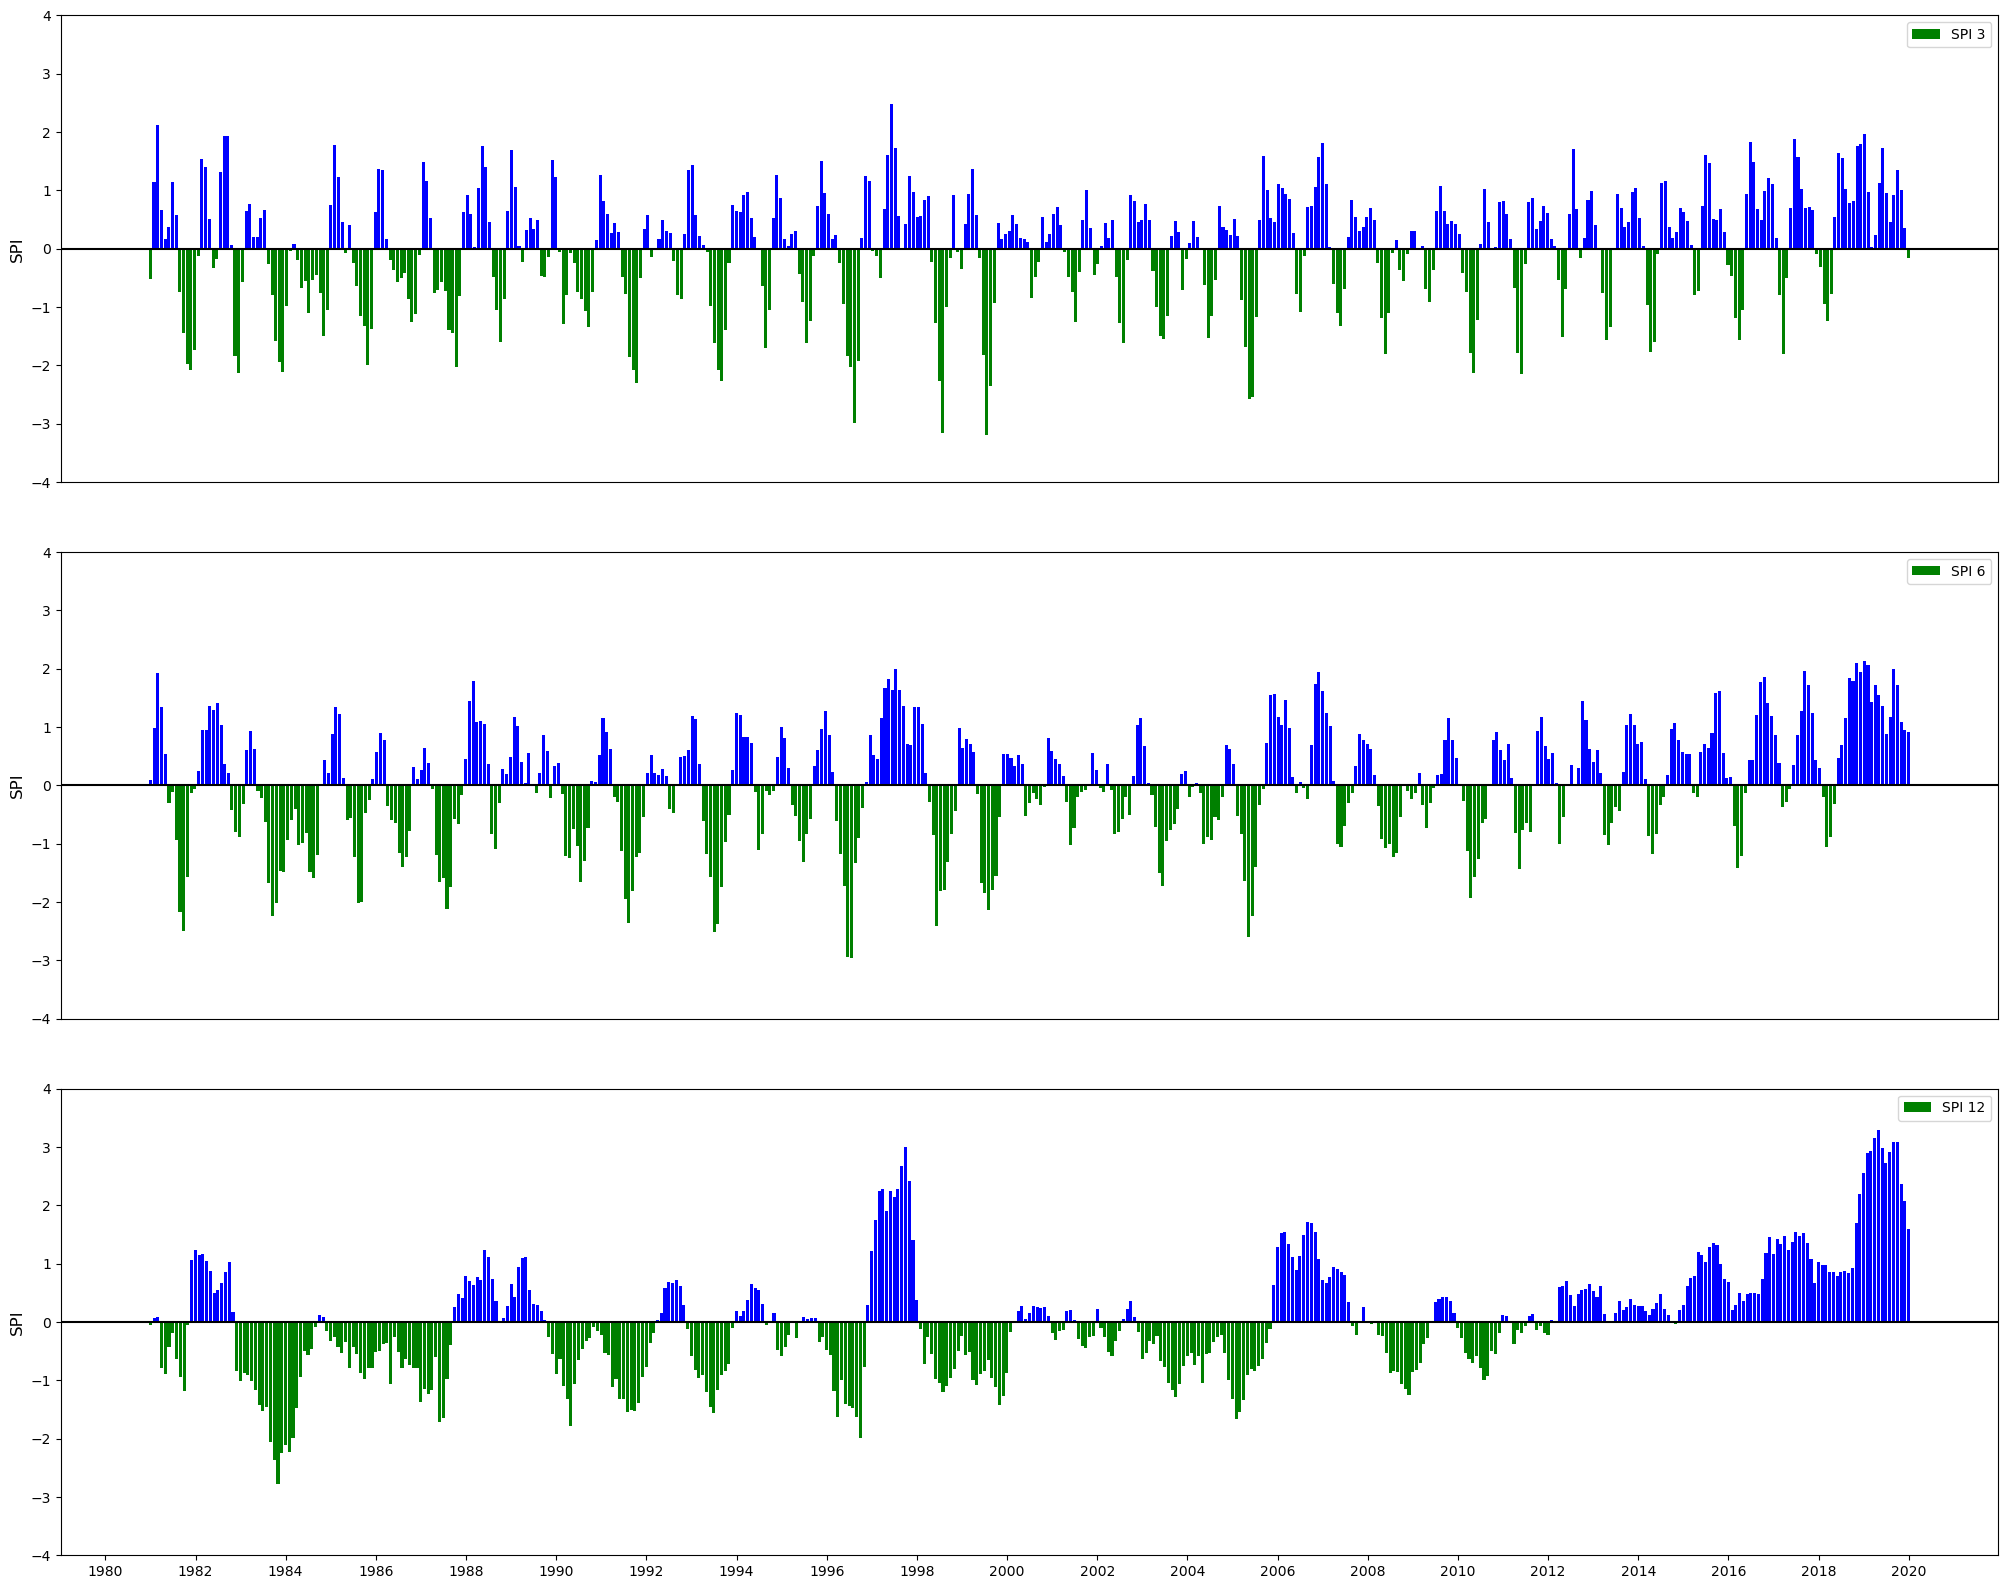

In [9]:
fig, axes = plt.subplots(nrows=3, figsize=(25, 20))
plt.subplots_adjust(hspace=0.15)
for i, ax in enumerate(axes):
    col_scheme=np.where(data['spi_'+str(times[i])]>0, 'b','g')

    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    ax.bar(data.index, data['spi_'+str(times[i])], width=25, align='center', color=col_scheme, label='SPI '+str(times[i]))
    ax.axhline(y=0, color='k')
    ax.xaxis.set_major_locator(mdates.YearLocator(2))
    ax.legend(loc='upper right')
    ax.set_yticks(range(-4, 5)), range(-3,5)
    ax.set_ylabel('SPI', fontsize=12)
    
    if i<len(times)-1:
        ax.set_xticks([],[])



# positive SPI values indicate wet conditions, while negative values indicate dry conditions.